In [57]:
# computer vision libraries

import torch as t
from torch import nn

# import torchvision
import torchvision as tv
from torchvision import datasets
from torchvision.transforms import ToTensor

# import matplotlib for visualization
import matplotlib.pylab as plt

# check the version
print(f"Pytorch version: {t.__version__}\ntorchvision version: {tv.__version__}")

Pytorch version: 2.0.0+cu117
torchvision version: 0.15.1+cu117


## 1. Getting a dataset
we will use very basic dataset what used in computer vision problem. 
[FashionMNIST](https://github.com/zalandoresearch/fashion-mnist) dataset, made by Zalando Research, is similar setup.

In [2]:
# Get the training data
train_data = datasets.FashionMNIST(
    root='/media/mahfuz/Media/datasets/fashionMNIST', # where to download data to?
    train=True,
    download=True,
    transform=ToTensor(), # images come as PIL format, we want to turn torch tensor
    target_transform=None
)
print(f'Train dataset download is completed....')

# get the test data
test_data = datasets.FashionMNIST(
    root='/media/mahfuz/Media/datasets/fashionMNIST',
    train=False,
    download=True,
    transform=ToTensor()
)
print(f'Test dataset download is completed....')

Train dataset download is completed....
Test dataset download is completed....


Let's check out the first sample of the training data

In [3]:
image, label = train_data[0]
image, label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

### 1.1 input and output shapes of the computer vision model

We've got big tensor of values leading to the single value for the target (the label), let's see the image shape

In [4]:
# what's the shape of the image? 
image.shape

torch.Size([1, 28, 28])

The shape of the image tensor is ```[1, 28, 28]``` or more specifically:
```python
[color_channels = 1, height=28, width=28]
```
Having ```color_channels=1``` means the images is grayscale.

Let's check out more shapes of our data.

In [5]:
# how many samples are there?
len(train_data.data), len(train_data.targets), len(test_data.data), len(test_data.targets)

(60000, 60000, 10000, 10000)

We have got 60,000 training samples and 10,000 testing samples

what classes are there?

We can find these via the ```.classes``` attribute.

In [6]:
# see classes
class_names = train_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

There have 10 different classes means, the problem is multi-class classification. Let's get visual.

### 1.2 Visualizing Data

Image shape: torch.Size([1, 28, 28])


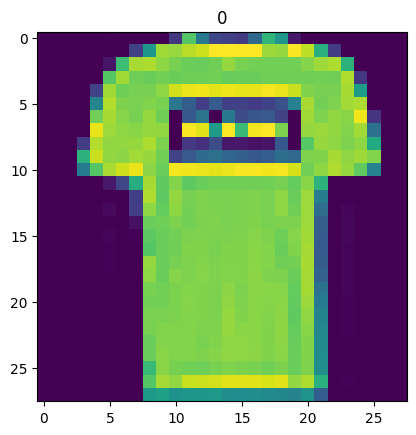

In [7]:
import matplotlib.pyplot as plt
image, label = train_data[1]
print(f"Image shape: {image.shape}")
plt.imshow(image.squeeze())
plt.title(label);

We will turn the image into grayscale using the ```cmap``` parameter of ```plt.imshow()```

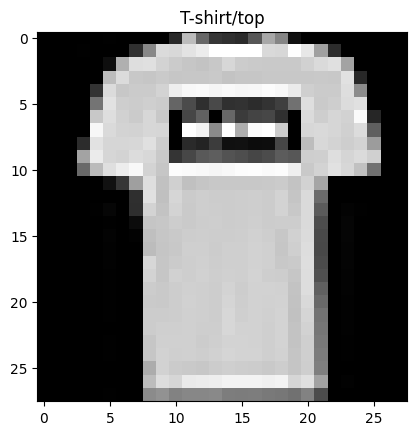

In [8]:
plt.imshow(image.squeeze(), cmap='gray')
plt.title(class_names[label]);

Let's plot more image

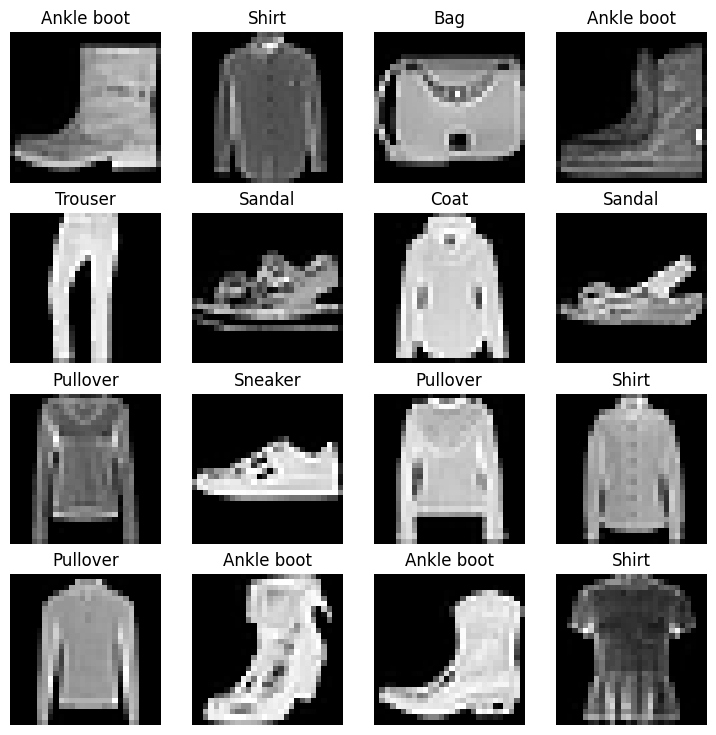

In [9]:
# plot more image
t.manual_seed(42)
fig = plt.figure(figsize=(9,9))
rows, cols = 4, 4
for i in range(1, rows*cols+1):
    random_idx = t.randint(0, len(train_data), size=[1]).item()
    img, label = train_data[random_idx]
    fig.add_subplot(rows, cols, i)
    plt.imshow(img.squeeze(), cmap='gray')
    plt.title(class_names[label])
    plt.axis(False);

In [10]:
# debug
random_i = t.randint(0, len(train_data), size=[1]).item()
print(f'random number is: {random_i}')


t.randint(0, 5, size=[1]).item()

random number is: 29315


0

## 2. Prepare DataLoader
Library: ```torch.utils.data.DataLoader``` or ```DataLoader```

In [11]:
from torch.utils.data import DataLoader

# set hyperparameter = batch size
bs = 32 # 32 is good batch size to train or test a dataset

# turn datasets into iterables(batches)
train_dataloader = DataLoader(
    train_data, # the dataset, which turn into the iterable
    batch_size=bs, # sample size
    shuffle=True, # shuffle data every epoch?
)

test_dataloader = DataLoader(
    test_data,
    batch_size=bs,
    shuffle=False
)

In [12]:
# Let's check what we have created
print(f"Dataloaders: {train_dataloader, test_dataloader}")
print(f"Lenght of train dataloader: {len(train_dataloader)} batches of {bs}")
print(f"Lenght of test dataloader: {len(test_dataloader)} batches of {bs}")

Dataloaders: (<torch.utils.data.dataloader.DataLoader object at 0x7f282297d7d0>, <torch.utils.data.dataloader.DataLoader object at 0x7f28252fa490>)
Lenght of train dataloader: 1875 batches of 32
Lenght of test dataloader: 313 batches of 32


In [13]:
# let's check the inside of the train/test dataloader
train_feature_batch, train_labels_batch = next(iter(train_dataloader))
test_feature_batch, test_labels_batch = next(iter(test_dataloader))

print(f"train batch: {train_feature_batch.shape}, {train_labels_batch.shape}")
print(f"test batch: {test_feature_batch.shape}, {test_labels_batch.shape}")

train batch: torch.Size([32, 1, 28, 28]), torch.Size([32])
test batch: torch.Size([32, 1, 28, 28]), torch.Size([32])


Image size: torch.Size([1, 28, 28])
Label: 1, label size: torch.Size([])


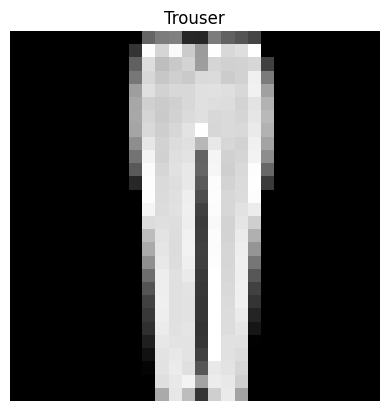

In [14]:
# check the data, that remain unchanged

t.manual_seed(42)
random_idx_feature_batch = t.randint(0, len(train_feature_batch), size=[1]).item()
img, label = train_feature_batch[random_idx_feature_batch], train_labels_batch[random_idx_feature_batch]
plt.imshow(img.squeeze(), cmap='gray')
plt.title(class_names[label])
plt.axis("Off")

print(f"Image size: {img.shape}")
print(f"Label: {label}, label size: {label.shape}")

## 3. Model: Build a base model
- ```nn.Module``` module
- ```nn.Linear()``` layers
- [```nn.Flatten()``` layer](https://pytorch.org/docs/stable/generated/torch.nn.Flatten.html)

In [15]:
# create a flatten layer
flatten_model = nn.Flatten() # all nn modules function as a model 

# get a single sample
x = train_feature_batch[0]

# flatten the sample
output = flatten_model(x) # perform forward pass

print(f"Shape before flattening: {x.shape} -> [color_channels, height, width]")
print(f"Shape after flattening: {output.shape} -> [color_channels, height*width]")

Shape before flattening: torch.Size([1, 28, 28]) -> [color_channels, height, width]
Shape after flattening: torch.Size([1, 784]) -> [color_channels, height*width]


In [16]:
# check the flatten or non flatten output
#print(x)
print(output)

tensor([[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0078, 0.0078,
         0.0000, 0.0000, 0.0000, 0.7294, 0.8471, 0.8431, 0.8627, 0.9686, 0.0000,
         0.0000, 0.0000, 0.0078, 0.0078, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0078, 0.0000,
         0.0000, 0.0000, 0.0000, 0.3922, 0.9020, 0.9176, 0.9490, 0.9333, 0.9255,
         0.6627, 0.0000, 0.0000, 0.0000, 0.0000, 0.0157, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000,
         0.0000, 0.3294, 0.7216, 0.9647, 0.9216, 0.8510, 0.8667, 0.8667, 0.8588,
         0.8431, 0.9059, 1.0000, 0.7294, 0.3686, 0.0000, 0.0000, 0.0039, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0157, 0.0000,
         0.0588, 0.7725, 0.9137, 0.8824, 0.8471, 0.8275, 0.8510, 0.9020, 0.8745,
         0.8706, 0.8745, 0.8353, 0.8392, 0.8863, 0.9059, 0.8157, 0.2039, 0.0000,
         0.0157, 0.0000, 0.0

Let's create a model using ```nn.Flatten()``` as the first layer

In [17]:
from torch import nn
class FashionMNISTModelv0(nn.Module):
    def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
        super().__init__()
        self.layer_stack = nn.Sequential(
            nn.Flatten(), # neural networks like their input in vector form
            nn.Linear(in_features=input_shape, out_features=hidden_units),
            nn.Linear(in_features=hidden_units, out_features=output_shape) 
        )
    
    def forward(self, x):
        return self.layer_stack(x)

Let's create an instance of our model and send to the CPU for now (we'll run a small test for running ```model_0``` on CPU vs. a similar model on GPU soon).

In [18]:
t.manual_seed(42)

# make a model with parameters
model_cpu = FashionMNISTModelv0(
    input_shape=784,
    hidden_units=10,
    output_shape=len(class_names)
)
model_cpu.to('cpu')

FashionMNISTModelv0(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

### 3.1 Loss, optimizer and evaluation maetics

In [19]:
import requests
from pathlib import Path

# download helper functions from learn pytorch repo

if Path('helper_function.py').is_file():
    print("'helper_function.py' already exists, skipping download")
else:
    print("Downloading helper_function.py")
    request = requests.get('https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py')
    with open('helper_function.py','wb') as f:
        f.write(request.content)
    print('helper_function.py is downloaded.')

'helper_function.py' already exists, skipping download


In [20]:
# import accuracy metric
from helper_function import accuracy_fn

# setup loss funcation and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = t.optim.SGD(params=model_cpu.parameters(), lr=0.1)

### 3.2 Creating a function to time our experiments
let's try to trian the model with tracking the time using ```timeit.default_timer()``` python ```timeit``` module.

In [21]:
from timeit import default_timer as timer

def print_train_time(start: float, end:float, device: t.device = None):
    """prints difference between start and end time

    args:
        start (float): Start time of computation (preferred in timeit format)
        end (float): End time of computation.
        devie ([type], optional): Device that compute is running on. Defaults to None
    
    Return:
        float: time between start and end in seconds (higher is longer)
    """
    total_time = end - start
    print(f"train time on {device}: {total_time:.3f} seconds")
    return total_time

### 3.3 Creating a training loop and training a model on batches of data

Let's step through it:

1. Loop through epochs.
2. Loop through training batches, perform training steps, calculate the train loss _per batch_.
3. Loop through testing batches, perform testing steps, calculate the test loss _per batch_.
4. Print out what's happening.
5. Time it all (for fun).

In [22]:
# import tqdm for progress bar
from tqdm.auto import tqdm

# set the seed and start the timer
t.manual_seed(42)
train_time_start_on_cpu = timer()

# set the number of epoch 
epochs = 3

# create training and tesing loop
for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epochs}\n------------")

    # training
    train_loss = 0

    # add a loop to loop through training batches
    for batch, (X, y) in enumerate(train_dataloader):
        model_cpu.train()

        # 1. forward pass
        y_pred = model_cpu(X)

        # 2. Calculate loss(per batch)
        loss = loss_fn(y_pred, y)
        train_loss += loss
        #print(f"{train_loss}")


        # 3. optimizer zero grad
        optimizer.zero_grad()


        # 4. loss backward
        loss.backward()

        # 5. Optimizer step
        optimizer.step()

        # print out how many sample have been seen
        if batch % 400 == 0:
            print(f"Looked at {batch * len(X)}/{len(train_dataloader.dataset)} samples")

    # divide total train loss by length of train dataloader 
    train_loss /= len(train_dataloader)
    #print(f"train_loss")


    # testing
    # setup variables for accumulatively adding up loss and accuracy
    test_loss, test_acc = 0, 0
    model_cpu.eval()
    with t.inference_mode():
        for X, y in test_dataloader:
            # 1. forward pass
            test_pred = model_cpu(X)

            # 2. Calculate loss (accumatively)
            test_loss += loss_fn(test_pred, y) # accumulatively add up the loss per batch
            #print(f'{test_loss}')

            # 3. Calculate accuracy (preds need to be same as y_true)
            test_acc += accuracy_fn(y_true=y, y_pred=test_pred.argmax(dim=1))
            #print(f'{test_acc}')
        # calculaitons on test matrics need to happen inside torch.inference_mode()
        # divide total test loss by length of test dataloader (per batch)
        test_loss /= len(test_dataloader)
        #print(f'{test_loss}')

        # divide total accuracy by length of test dataloader (per batch)
        test_acc /= len(test_dataloader)
    
    # print out what's happening
    print(f"\nTrain loss: {train_loss:.5f} | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%\n")

# Calculate training time
train_time_end_on_cpu = timer()
total_train_time_model_0 = print_train_time(
    start=train_time_start_on_cpu, 
    end=train_time_end_on_cpu,
    device=str(next(model_cpu.parameters()).device)
)

/home/mahfuz/anaconda3/envs/torch/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 3
------------
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples


 33%|███▎      | 1/3 [00:06<00:12,  6.07s/it]


Train loss: 0.59039 | Test loss: 0.50954, Test acc: 82.04%

Epoch: 3
------------
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples


 67%|██████▋   | 2/3 [00:12<00:06,  6.34s/it]


Train loss: 0.47633 | Test loss: 0.47989, Test acc: 83.20%

Epoch: 3
------------
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples


100%|██████████| 3/3 [00:19<00:00,  6.38s/it]


Train loss: 0.45503 | Test loss: 0.47664, Test acc: 83.43%

train time on cpu: 19.136 seconds


## 4. Make predictions and get Model 0 results

In [23]:
t.manual_seed(42)

def eval_model(model: t.nn.Module,
               data_loader: t.utils.data.DataLoader,
               loss_fn:t.nn.Module,
               accuracy_fn):
    """ 
    Return a directory containing the result of model predicting on data_loader.

    Args:
        model(torch.nn.Module): a pythonch model that capable of making prediciton on data_loader.
        data_loader(torch.utils.data.DataLoader): The target dataset to predict on.
        loss_fn(torch.nn.Module): the loss function of model.
        accuracy_fn: an accuracy function to compare the model predictions to the truth labels.

    Return:
        (dict): Results of model making predictions on data_loader.
    """
    loss, acc = 0, 0
    model.eval()
    with t.inference_mode():
        for X, y in data_loader:
            # make predictions with the model
            y_pred = model(X)

            # accumulate the loss and accuracy values per batch
            loss += loss_fn(y_pred, y)
            acc += accuracy_fn(y_true=y, y_pred=y_pred.argmax(dim=1))
        
        # scale loss and acc to find the avarage loss / acc per batch
        loss /= len(data_loader)
        acc /= len(data_loader)
    
    return {"model_name": model.__class__.__name__, # only works when model was created with a class
            "model_loss": loss.item(),
            "model_acc": acc}

# calculate model 0 result on test dataset
model_cpu_result = eval_model(
    model=model_cpu,
    data_loader=test_dataloader,
    loss_fn=loss_fn,
    accuracy_fn=accuracy_fn
)

Check the model with class name

In [24]:
model_cpu_result

{'model_name': 'FashionMNISTModelv0',
 'model_loss': 0.47663894295692444,
 'model_acc': 83.42651757188499}

## 5. Setup device agnostic-code (for using a GPU if there is one)

In [25]:
device = "cuda" if t.cuda.is_available() else "cpu"
device

'cuda'

## 5. Setup device agnostic-code (for using a GPU if there is one)
Let's build another model.

Let's build non-linear function using ```nn.ReLU()``` between each linear layer.

In [26]:
# create a model with non-linear and liner layer
class FashionMNISTModelv1(nn.Module):
    def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
        super().__init__()
        self.layer_stack = nn.Sequential(
            nn.Flatten(), 
            nn.Linear(in_features=input_shape, out_features=hidden_units),
            nn.ReLU(),
            nn.Linear(in_features=hidden_units, out_features=output_shape),
            nn.ReLU()
    )
    def forward(self, x: t.Tensor):
        return self.layer_stack(x)

In [27]:
t.manual_seed(42)
model_gpu = FashionMNISTModelv1(
    input_shape=784,
    hidden_units=10,
    output_shape=len(class_names)
).to(device)
next(model_gpu.parameters()).device # check model device

device(type='cuda', index=0)

### 6.1 Setup loss, optimizer and evaluation metrics

In [28]:
from helper_function import accuracy_fn

loss_fnc = nn.CrossEntropyLoss()
optimizer = t.optim.SGD(params=model_gpu.parameters(),
                        lr=0.1)

### 6.2 Functionizing training and test loops
For the training loop we'll create a function called ```train_function()``` which takes in a model, a DataLoader a loss function and an optimizer.

The testing loop will be similar but it'll be called ```test_functon()``` and it'll take in a model, a DataLoader, a loss function and an evaluation function.

In [29]:
def train_function(model: t.nn.Module,
                   data_loader: t.utils.data.DataLoader,
                   loss_fnc: t.nn.Module,
                   optimizer: t.optim.Optimizer,
                   accuracy_fn,
                   device: t.device = device):
    train_loss, train_acc = 0, 0
    model.to(device)
    for batch, (X, y) in enumerate(data_loader):
        X, y = X.to(device), y.to(device)
        #model.train()

        # 1. forward pass
        y_pred = model(X)

        # 2. Calculate loss (per batch)
        loss = loss_fnc(y_pred, y)
        train_loss += loss
        train_acc += accuracy_fn(y_true=y, y_pred=y_pred.argmax(dim=1))

        # 3. optimizer zero grad
        optimizer.zero_grad()

        # 4. backward pass
        loss.backward()

        # 5. optimizer step
        optimizer.step()

        # # print how many sample have been seen 
        # if batch % 500 == 0:
        #     print(f"Looked at {batch * len(X)}/{len(data_loader.dataset)} samples")
        
    # divide total train loss by length of train dataloader
    train_loss /= len(data_loader)
    # divide total train accuracy length of train dataloader
    train_acc /= len(data_loader)
    print(f"Train loss: {train_loss:.3f} | Train accuracy: {train_acc:.3f}%")

def test_function(model: t.nn.Module,
                  data_loader: t.utils.data.DataLoader,
                  loss_fnc: t.nn.Module,
                  accuracy_fn,
                  device: t.device = device):
    test_loss, test_acc = 0, 0
    model.to(device)
    model.eval()
    with t.inference_mode():
        for X, y in data_loader:
            X, y = X.to(device), y.to(device)
            # 1. forward pass
            test_pred = model(X)

            # 2. calculate loss (accumulatively)
            test_loss += loss_fnc(test_pred, y)
            # 3. Calculate accuracy
            test_acc += accuracy_fn(y_true=y, y_pred=test_pred.argmax(dim=1))

        # divide total test loss by length of test dataloader (per batch)
        test_loss /= len(data_loader)

        # divide total test accuracy by length of test dataloader (per batch)
        test_acc /= len(data_loader)
        
        print(f"Test loss: {test_loss:.4f} | Test Accuracy: {test_acc:.3f}%\n")

Let's also time things to see how long our code takes to run on the GPU.

In [30]:
t.manual_seed(42)

# measure time
from timeit import default_timer as timer
train_time_start_on_gpu = timer()

epochs = 3
for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}\n--------------")
    train_function(
        model=model_gpu,
        data_loader=train_dataloader,
        loss_fnc=loss_fn,
        optimizer=optimizer,
        accuracy_fn=accuracy_fn
    )
    test_function(
        model=model_gpu,
        data_loader=test_dataloader,
        loss_fnc=loss_fn,
        accuracy_fn=accuracy_fn
    )
train_time_end_on_gpu = timer()
total_train_time_model_1 = print_train_time(start=train_time_start_on_gpu,
                                            end=train_time_end_on_gpu,
                                            device=device)

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
--------------
Train loss: 1.092 | Train accuracy: 61.343%


 33%|███▎      | 1/3 [00:07<00:14,  7.32s/it]

Test loss: 0.9564 | Test Accuracy: 64.996%

Epoch: 1
--------------
Train loss: 0.781 | Train accuracy: 71.928%


 67%|██████▋   | 2/3 [00:14<00:06,  6.98s/it]

Test loss: 0.7223 | Test Accuracy: 73.912%

Epoch: 2
--------------
Train loss: 0.670 | Train accuracy: 75.937%


100%|██████████| 3/3 [00:20<00:00,  6.87s/it]

Test loss: 0.6850 | Test Accuracy: 75.020%

train time on cuda: 20.614 seconds


Let's find the evaluation metrics

In [31]:
t.manual_seed(42)
def eval_model_gpu(model: t.nn.Module,
                   data_loader: t.utils.data.DataLoader,
                   loss_fnc: t.nn.Module,
                   accuracy_fn,
                   device: t.device = device):
    """Evaluates a given model on a given dataset.
    args:
        model(torch.nn.Module): a pytorch model capable of making predictions on data_loader.
        data_loader(torch.utils.data.DataLoader): The target dataset to predict on.
        loss_fnc(torch.nn.Module): loss function of model
        accuracy_fn: an accuracy function to compare the models predictions to the truth labels.
        device(torch.device = device): target device to compute on. Defaults to device.

    Returns:
        (dict): Results of model making predictions on data_loader.
    """
    loss, acc = 0, 0
    model.eval()
    with t.inference_mode():
        for X, y in data_loader:
            # send data to the target device
            X, y = X.to(device), y.to(device)
            y_pred = model(X)
            loss += loss_fnc(y_pred, y)
            acc += accuracy_fn(y_true=y, y_pred=y_pred.argmax(dim=1))

        # scale loss and acc
        loss /= len(data_loader)
        acc /= len(data_loader)
    return {"model_name": model.__class__.__name__,
            "model_loss": loss.item(),
            "model_acc": acc}
    

In [32]:
# Calculate model gpu result with device-agnostic code
model_gpu_result = eval_model_gpu(model=model_gpu,
                                  data_loader=test_dataloader,
                                  loss_fnc=loss_fn,
                                  accuracy_fn=accuracy_fn,
                                  device=device)
model_gpu_result

{'model_name': 'FashionMNISTModelv1',
 'model_loss': 0.6850008964538574,
 'model_acc': 75.01996805111821}

In [33]:
model_cpu_result

{'model_name': 'FashionMNISTModelv0',
 'model_loss': 0.47663894295692444,
 'model_acc': 83.42651757188499}

Woah, in this case, it looks like adding non-linearities to our model made it perform worse than the baseline.

That's a thing to note in machine learning, sometimes the thing you thought should work doesn't.

And then the thing you thought might not work does.

It's part science, part art.

From the looks of things, it seems like our model is overfitting on the training data.

Overfitting means our model is learning the training data well but those patterns aren't generalizing to the testing data.

Two of the main to fix overfitting include:
1. Using a smaller or different model (some models fit certain kinds of data better than others).
2. Using a larger dataset (the more data, the more chance a model has to learn generalizable patterns).
There are more, but I'm going to leave that as a challenge for you to explore.

Try searching online, "```ways to prevent overfitting in machine learning```" and see what comes up.

## 7. Model 2: Building a Convolutional Neural Network (CNN)

Now we, will try Convolutional Neural Network (CNN) which is very capable in their segments. 

Let's try it out. 
There have some step in convolutiotal neural network:
1. ```Input Layer```
2. ```Covolutional layer```
3. ```Activation layer```
4. ```pooling layer```
5. ```output layer```

In [34]:
# create a convolutional neural network 

class FashionMNISTModelv2(nn.Module):
    """
    Model architecture copying TinyVGG from: 
    https://poloclub.github.io/cnn-explainer/
    """
    def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
        super().__init__()
        self.block_1 = nn.Sequential(
            nn.Conv2d(
                in_channels=input_shape,
                out_channels=hidden_units,
                kernel_size=3, # how big is the square that's going over the image?
                stride=1, # default
                padding=1 # options = "valid" (no padding) or same
            ),
            nn.ReLU(),
            nn.Conv2d(
                in_channels=hidden_units,
                out_channels=hidden_units, 
                kernel_size=3, 
                stride=1, 
                padding=1
            ),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2) # default stride value is same as kernel_size
        )
        self.block_2 = nn.Sequential(
            nn.Conv2d(
                in_channels=hidden_units,
                out_channels=hidden_units,
                kernel_size=3, # how big is the square that's going over the image?
                stride=1, # default
                padding=1 # options = "valid" (no padding) or same
            ),
            nn.ReLU(),
            nn.Conv2d(
                in_channels=hidden_units,
                out_channels=hidden_units, 
                kernel_size=3, 
                stride=1, 
                padding=1
            ),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2) # default stride value is same as kernel_size
        )
        self.classifier = nn.Sequential(
            nn.Flatten(),
            # where did this in_features shape come from?
            nn.Linear(in_features=hidden_units*7*7, out_features=output_shape)
        )

    def forward(self, x:t.Tensor):
        x = self.block_1(x)
        #print(f'block 1 shape: {x.shape}')
        x = self.block_2(x)
        #print(f'block 2 shape: {x.shape}')
        x = self.classifier(x)
        #print(f'classifier shape: {x.shape}')
        return x

In [35]:
# Let's see the model inside
t.manual_seed(42)

model_2 = FashionMNISTModelv2(input_shape=1, hidden_units=10, output_shape=len(class_names)).to(device)
model_2

FashionMNISTModelv2(
  (block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

### 7.1 Stepping through ```nn.Conv2d()```
- ```nn.Conv2d()``` known as colvolutional layer
- ```nn.MaxPool2d()``` known as max pooling layer

In [36]:
# just for test
t.manual_seed(42)

# Create sample batch of random numbers with same size as image batch
images = t.randn(size=(32, 3, 64, 64)) # [batch_size, color_channels, height, width]
test_image = images[0] # get a single image for testing
print(f"Image batch shape: {images.shape} -> [batch_size, color_channels, height, width]")
print(f"Single image shape: {test_image.shape} -> [color_channels, height, width]") 
print(f"Single image pixel values:\n{test_image}")

Image batch shape: torch.Size([32, 3, 64, 64]) -> [batch_size, color_channels, height, width]
Single image shape: torch.Size([3, 64, 64]) -> [color_channels, height, width]
Single image pixel values:
tensor([[[ 1.9269,  1.4873,  0.9007,  ...,  1.8446, -1.1845,  1.3835],
         [ 1.4451,  0.8564,  2.2181,  ...,  0.3399,  0.7200,  0.4114],
         [ 1.9312,  1.0119, -1.4364,  ..., -0.5558,  0.7043,  0.7099],
         ...,
         [-0.5610, -0.4830,  0.4770,  ..., -0.2713, -0.9537, -0.6737],
         [ 0.3076, -0.1277,  0.0366,  ..., -2.0060,  0.2824, -0.8111],
         [-1.5486,  0.0485, -0.7712,  ..., -0.1403,  0.9416, -0.0118]],

        [[-0.5197,  1.8524,  1.8365,  ...,  0.8935, -1.5114, -0.8515],
         [ 2.0818,  1.0677, -1.4277,  ...,  1.6612, -2.6223, -0.4319],
         [-0.1010, -0.4388, -1.9775,  ...,  0.2106,  0.2536, -0.7318],
         ...,
         [ 0.2779,  0.7342, -0.3736,  ..., -0.4601,  0.1815,  0.1850],
         [ 0.7205, -0.2833,  0.0937,  ..., -0.1002, -2.3609,

Example of what happens when you change the hyperparameters of a ```nn.Conv2d()``` layer.

In [37]:
t.manual_seed(42)

# Create a convolutional layer with same dimensions as TinyVGG 
# (try changing any of the parameters and see what happens)
conv_layer = nn.Conv2d(in_channels=3,
                       out_channels=10,
                       kernel_size=3,
                       stride=1,
                       padding=0) # also try using "valid" or "same" here 

# Pass the data through the convolutional layer
conv_layer(test_image) # Note: If running PyTorch <1.11.0, this will error because of shape issues (nn.Conv.2d() expects a 4d tensor as input) 

tensor([[[ 1.5396,  0.0516,  0.6454,  ..., -0.3673,  0.8711,  0.4256],
         [ 0.3662,  1.0114, -0.5997,  ...,  0.8983,  0.2809, -0.2741],
         [ 1.2664, -1.4054,  0.3727,  ..., -0.3409,  1.2191, -0.0463],
         ...,
         [-0.1541,  0.5132, -0.3624,  ..., -0.2360, -0.4609, -0.0035],
         [ 0.2981, -0.2432,  1.5012,  ..., -0.6289, -0.7283, -0.5767],
         [-0.0386, -0.0781, -0.0388,  ...,  0.2842,  0.4228, -0.1802]],

        [[-0.2840, -0.0319, -0.4455,  ..., -0.7956,  1.5599, -1.2449],
         [ 0.2753, -0.1262, -0.6541,  ..., -0.2211,  0.1999, -0.8856],
         [-0.5404, -1.5489,  0.0249,  ..., -0.5932, -1.0913, -0.3849],
         ...,
         [ 0.3870, -0.4064, -0.8236,  ...,  0.1734, -0.4330, -0.4951],
         [-0.1984, -0.6386,  1.0263,  ..., -0.9401, -0.0585, -0.7833],
         [-0.6306, -0.2052, -0.3694,  ..., -1.3248,  0.2456, -0.7134]],

        [[ 0.4414,  0.5100,  0.4846,  ..., -0.8484,  0.2638,  1.1258],
         [ 0.8117,  0.3191, -0.0157,  ...,  1

In [38]:
# Add extra dimension to test image
test_image.unsqueeze(dim=0).shape

torch.Size([1, 3, 64, 64])

In [39]:
# Pass test image with extra dimension through conv_layer
conv_layer(test_image.unsqueeze(dim=0)).shape

torch.Size([1, 10, 62, 62])

In [40]:
# just for check
t.manual_seed(42)
# Create a new conv_layer with different values (try setting these to whatever you like)
conv_layer_2 = nn.Conv2d(in_channels=3, # same number of color channels as our input image
                         out_channels=10,
                         kernel_size=(5, 5), # kernel is usually a square so a tuple also works
                         stride=2,
                         padding=0)

# Pass single image through new conv_layer_2 (this calls nn.Conv2d()'s forward() method on the input)
conv_layer_2(test_image.unsqueeze(dim=0)).shape

torch.Size([1, 10, 30, 30])

In [41]:
# Check out the conv_layer_2 internal parameters
print(conv_layer_2.state_dict())

OrderedDict([('weight', tensor([[[[ 0.0883,  0.0958, -0.0271,  0.1061, -0.0253],
          [ 0.0233, -0.0562,  0.0678,  0.1018, -0.0847],
          [ 0.1004,  0.0216,  0.0853,  0.0156,  0.0557],
          [-0.0163,  0.0890,  0.0171, -0.0539,  0.0294],
          [-0.0532, -0.0135, -0.0469,  0.0766, -0.0911]],

         [[-0.0532, -0.0326, -0.0694,  0.0109, -0.1140],
          [ 0.1043, -0.0981,  0.0891,  0.0192, -0.0375],
          [ 0.0714,  0.0180,  0.0933,  0.0126, -0.0364],
          [ 0.0310, -0.0313,  0.0486,  0.1031,  0.0667],
          [-0.0505,  0.0667,  0.0207,  0.0586, -0.0704]],

         [[-0.1143, -0.0446, -0.0886,  0.0947,  0.0333],
          [ 0.0478,  0.0365, -0.0020,  0.0904, -0.0820],
          [ 0.0073, -0.0788,  0.0356, -0.0398,  0.0354],
          [-0.0241,  0.0958, -0.0684, -0.0689, -0.0689],
          [ 0.1039,  0.0385,  0.1111, -0.0953, -0.1145]]],


        [[[-0.0903, -0.0777,  0.0468,  0.0413,  0.0959],
          [-0.0596, -0.0787,  0.0613, -0.0467,  0.0701],

In [42]:
# Get shapes of weight and bias tensors within conv_layer_2
print(f"conv_layer_2 weight shape: \n{conv_layer_2.weight.shape} -> [out_channels=10, in_channels=3, kernel_size=5, kernel_size=5]")
print(f"\nconv_layer_2 bias shape: \n{conv_layer_2.bias.shape} -> [out_channels=10]")

conv_layer_2 weight shape: 
torch.Size([10, 3, 5, 5]) -> [out_channels=10, in_channels=3, kernel_size=5, kernel_size=5]

conv_layer_2 bias shape: 
torch.Size([10]) -> [out_channels=10]


### 7.2 Stepping through ```nn.MaxPool2d()```
check the max pooling layer using ```nn.MaxPool2d()```

In [43]:
# Print out original image shape without and with unsqueezed dimension
print(f"Test image original shape: {test_image.shape}")
print(f"Test image with unsqueezed dimension: {test_image.unsqueeze(dim=0).shape}")

Test image original shape: torch.Size([3, 64, 64])
Test image with unsqueezed dimension: torch.Size([1, 3, 64, 64])


In [44]:
# create a sample nn.MaxPool2d() layer
max_pool_layer = nn.MaxPool2d(kernel_size=2)

In [45]:
# pass data through just the conv_layer
test_image_through_conv = conv_layer(test_image.unsqueeze(dim=0))
print(f"Shape after going through conv_layer(): {test_image_through_conv.shape}")

# pass data through the max pool layer
test_image_through_conv_and_max_pool = max_pool_layer(test_image_through_conv)
print(f"Shape after going through conv_layer() and max_pool_layer(): {test_image_through_conv_and_max_pool.shape}")

Shape after going through conv_layer(): torch.Size([1, 10, 62, 62])
Shape after going through conv_layer() and max_pool_layer(): torch.Size([1, 10, 31, 31])


Let's see this work with a smaller tensor.

In [46]:
t.manual_seed(42)
# Create a random tensor with a similiar number of dimensions to our images
random_tensor = t.randn(size=(1, 1, 2, 2))
print(f"Random tensor:\n{random_tensor}")
print(f"Random tensor shape: {random_tensor.shape}")

# Create a max pool layer
max_pool_layer = nn.MaxPool2d(kernel_size=2) # see what happens when you change the kernel_size value 

# Pass the random tensor through the max pool layer
max_pool_tensor = max_pool_layer(random_tensor)
print(f"\nMax pool tensor:\n{max_pool_tensor} <- this is the maximum value from random_tensor")
print(f"Max pool tensor shape: {max_pool_tensor.shape}")

Random tensor:
tensor([[[[0.3367, 0.1288],
          [0.2345, 0.2303]]]])
Random tensor shape: torch.Size([1, 1, 2, 2])

Max pool tensor:
tensor([[[[0.3367]]]]) <- this is the maximum value from random_tensor
Max pool tensor shape: torch.Size([1, 1, 1, 1])


### Exercise

In [47]:
# create a sample nn.AvgPool2d() layer
avg_pool_layer = nn.AvgPool2d(kernel_size=2)

# pass data through just the conv_layer
test_image_through_conv = conv_layer(test_image.unsqueeze(dim=0))
print(f"Shape after going through conv_layer(): {test_image_through_conv.shape}")

# pass data through the avg pool layer
test_image_through_conv_and_avg_pool = avg_pool_layer(test_image_through_conv)
print(f"Shape after going through conv_layer() and avg_pool_layer(): {test_image_through_conv_and_max_pool.shape}")

Shape after going through conv_layer(): torch.Size([1, 10, 62, 62])
Shape after going through conv_layer() and avg_pool_layer(): torch.Size([1, 10, 31, 31])


In [48]:
t.manual_seed(42)
# Create a random tensor with a similiar number of dimensions to our images
random_tensor = t.randn(size=(1, 1, 2, 2))
print(f"Random tensor:\n{random_tensor}")
print(f"Random tensor shape: {random_tensor.shape}")

# Create a avg pool layer
avg_pool_layer = nn.AvgPool2d(kernel_size=2) # see what happens when you change the kernel_size value 

# Pass the random tensor through the avg pool layer
avg_pool_tensor = avg_pool_layer(random_tensor)
print(f"\nAvg pool tensor:\n{avg_pool_tensor} <- this is the avarage value from random_tensor")
print(f"Avg pool tensor shape: {avg_pool_tensor.shape}")

Random tensor:
tensor([[[[0.3367, 0.1288],
          [0.2345, 0.2303]]]])
Random tensor shape: torch.Size([1, 1, 2, 2])

Avg pool tensor:
tensor([[[[0.2326]]]]) <- this is the avarage value from random_tensor
Avg pool tensor shape: torch.Size([1, 1, 1, 1])


### 7.3 Setup a loss function and optimizer for ```model_2```

- loss function: ```nn.CrossEntropyLoss()```
- optimizer: ```torch.optim.SGD()```

In [49]:
# Setup loss and optimizer
loss_fn_gpu = nn.CrossEntropyLoss()
optimizer_gpu = t.optim.SGD(params=model_2.parameters(), 
                             lr=0.1)

In [50]:
t.manual_seed(42)

# measure time
from timeit import default_timer as timer
train_time_start_on_gpu = timer()

# train and test model
epochs = 3
for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}\n--------------")
    train_function(
        data_loader=train_dataloader,
        model=model_2,
        loss_fnc=loss_fn_gpu,
        optimizer=optimizer_gpu,
        accuracy_fn=accuracy_fn,
        device=device
    )
    test_function(
        model=model_2,
        data_loader=test_dataloader,
        loss_fnc=loss_fn_gpu,
        accuracy_fn=accuracy_fn,
        device=device
    )

train_time_end_on_gpu = timer()
total_train_time_model_2 = print_train_time(
    start=train_time_start_on_gpu,
    end=train_time_end_on_gpu,
    device=device
)

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
--------------
Train loss: 0.597 | Train accuracy: 78.413%


 33%|███▎      | 1/3 [00:08<00:16,  8.10s/it]

Test loss: 0.4078 | Test Accuracy: 85.803%

Epoch: 1
--------------
Train loss: 0.362 | Train accuracy: 87.022%


 67%|██████▋   | 2/3 [00:15<00:07,  7.62s/it]

Test loss: 0.3512 | Test Accuracy: 87.200%

Epoch: 2
--------------
Train loss: 0.322 | Train accuracy: 88.305%


100%|██████████| 3/3 [00:22<00:00,  7.62s/it]

Test loss: 0.3245 | Test Accuracy: 88.319%

train time on cuda: 22.870 seconds


look like convolutional and max pool layer helped impove performance a little.
 
let's evaluate ```model_2```'s result with ```eval_model()``` fucntion. 

In [51]:
# Get model_2 results 
model_2_results = eval_model_gpu(
    model=model_2,
    data_loader=test_dataloader,
    loss_fnc=loss_fn_gpu,
    accuracy_fn=accuracy_fn
)
model_2_results

{'model_name': 'FashionMNISTModelv2',
 'model_loss': 0.32449376583099365,
 'model_acc': 88.31869009584665}

## 8. Compare model results and training time
we already trained 3 different model

1. ```model_cpu``` - our baseline model with 2 ```nn.Linear()``` layers.
2. ```model_gpu``` - the same model as baseline model except with ```nn.ReLU()``` layer in between the ```nn.Linear()``` layer.
3. ```model_2``` - this is CNN model mimics the TinyVGG architecture on the cnn website.

In [52]:
# let's conbine the models

import pandas as pd
compare_result = pd.DataFrame([model_cpu_result, model_gpu_result, model_2_results])
compare_result

,model_name,model_loss,model_acc
0,FashionMNISTModelv0,0.476639,83.426518
1,FashionMNISTModelv1,0.685001,75.019968
2,FashionMNISTModelv2,0.324494,88.318690


In [53]:
compare_result['training_time'] = [total_train_time_model_0, total_train_time_model_1, total_train_time_model_2]
compare_result

,model_name,model_loss,model_acc,training_time
0,FashionMNISTModelv0,0.476639,83.426518,19.135892
1,FashionMNISTModelv1,0.685001,75.019968,20.614032
2,FashionMNISTModelv2,0.324494,88.318690,22.870010


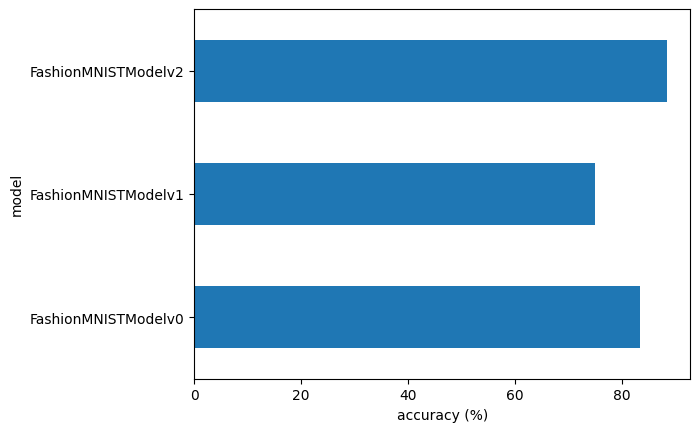

In [54]:
# Visualize our model results
compare_result.set_index("model_name")["model_acc"].plot(kind="barh")
plt.xlabel("accuracy (%)")
plt.ylabel("model");

## 9. Make and evaluate random predictions with best model

In [59]:
def make_predictions(model:t.nn.Module,
                     data:list, 
                     device:t.device = device):
    pred_probs = []
    model.eval()
    with t.inference_mode():
        # prepare sample
        for sample in data:
            sample = t.unsqueeze(sample, dim=0).to(device)

            # forward pass 
            pred_logit = model(sample)

            # get prediciton probability
            pred_prob = t.softmax(pred_logit.squeeze(), dim=0)

            # get pred_prob off gpu for further calculations
            pred_probs.append(pred_prob.cpu())
    # stack the pred_prob to turn list into a tensor
    return t.stack(pred_probs)

In [60]:
import random
random.seed(42)
test_samples = []
test_labels = []

for sample, label in random.sample(list(test_data), k=9):
    test_samples.append(sample)
    test_labels.append(label)

# view the first test sample shape and label
print(f"Test sample image shape: {test_samples[0].shape}\nTest sample label: {test_labels[0]} ({class_names[test_labels[0]]})")

Test sample image shape: torch.Size([1, 28, 28])
Test sample label: 5 (Sandal)


nd now we can use our ```make_predictions()``` function to predict on ```test_samples```

In [61]:
# Make predicitons on test samples with model 2
pred_probs = make_predictions(model=model_2, data=test_samples)

# view first two prediction probabilities list
pred_probs[:2]

tensor([[5.2035e-08, 1.4123e-08, 4.2367e-08, 3.4466e-09, 2.0439e-09, 9.9972e-01,
         1.5967e-07, 2.7318e-06, 2.0690e-06, 2.7773e-04],
        [6.5336e-02, 6.3580e-01, 1.5448e-03, 5.8703e-02, 1.7604e-01, 2.0826e-04,
         6.1710e-02, 1.9000e-04, 2.1687e-04, 2.5424e-04]])

In [62]:
# Turn the prediction probabilities into prediction labels by taking the argmax()
pred_classes = pred_probs.argmax(dim=1)
pred_classes

tensor([5, 1, 7, 4, 3, 0, 4, 7, 1])

In [63]:
# Are our predictions in the same form as our test labels? 
test_labels, pred_classes

([5, 1, 7, 4, 3, 0, 4, 7, 1], tensor([5, 1, 7, 4, 3, 0, 4, 7, 1]))

Let's visualize it

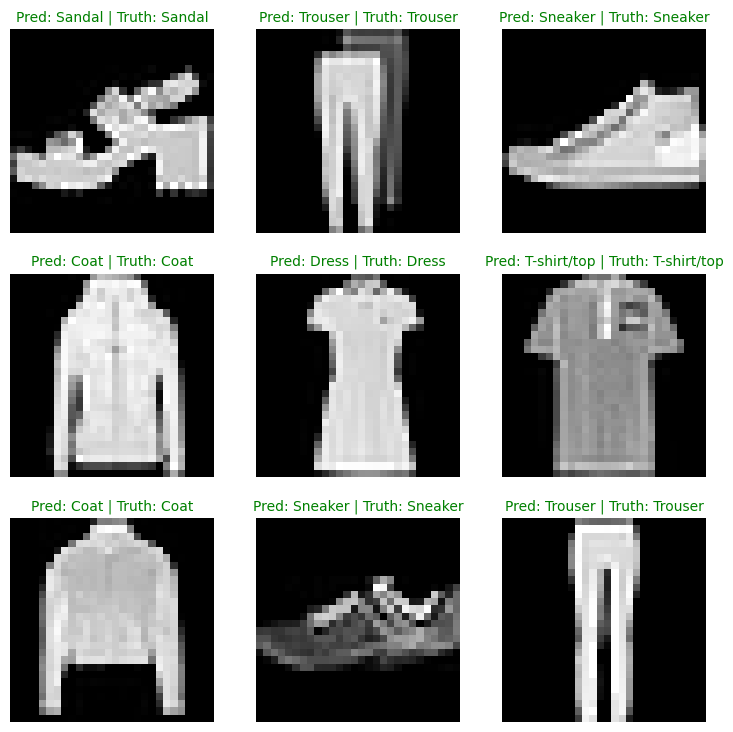

In [65]:
# plot predicitons
plt.figure(figsize=(9, 9))
nrows = 3
ncols = 3

for i, sample in enumerate(test_samples):
    # create a subplot
    plt.subplot(nrows, ncols, i+1)

    # plot the target image
    plt.imshow(sample.squeeze(), cmap="gray")

    # find the prediction label
    pred_label = class_names[pred_classes[i]]

    # get the truth label
    truth_label = class_names[test_labels[i]]

    # create the title text for the plot
    title_text = f"Pred: {pred_label} | Truth: {truth_label}"

    # check for equality and change title color accordingly
    if pred_label == truth_label:
        plt.title(title_text, fontsize = 10, c='g')
    else:
        plt.title(title_text, fontsize=10, c='r')
    plt.axis(False);

## 10. Making a confusion matrix for further prediction evaluation
To make a confusion matrix, we'll go through three steps:

1. Make predictions with our trained model, ```model_2``` (a confusion matrix compares predictions to true labels).
2. Make a confusion matrix using ```torchmetrics.ConfusionMatrix```.
3. Plot the confusion matrix using ```mlxtend.plotting.plot_confusion_matrix()```.

In [66]:
# Import tqdm for progress bar
from tqdm.auto import tqdm

# 1. Make predictions with trained model
y_preds = []
model_2.eval()
with t.inference_mode():
  for X, y in tqdm(test_dataloader, desc="Making predictions"):
    # Send data and targets to target device
    X, y = X.to(device), y.to(device)
    # Do the forward pass
    y_logit = model_2(X)
    # Turn predictions from logits -> prediction probabilities -> predictions labels
    y_pred = t.softmax(y_logit, dim=1).argmax(dim=1)
    # Put predictions on CPU for evaluation
    y_preds.append(y_pred.cpu())
# Concatenate list of predictions into a tensor
y_pred_tensor = t.cat(y_preds)

Making predictions: 100%|██████████| 313/313 [00:00<00:00, 399.08it/s]


In [67]:
# See if torchmetrics exists, if not, install it
try:
    import torchmetrics, mlxtend
    print(f"mlxtend version: {mlxtend.__version__}")
    assert int(mlxtend.__version__.split(".")[1]) >= 19, "mlxtend verison should be 0.19.0 or higher"
except:
    !pip install -q torchmetrics -U mlxtend # <- Note: If you're using Google Colab, this may require restarting the runtime
    import torchmetrics, mlxtend
    print(f"mlxtend version: {mlxtend.__version__}")

mlxtend version: 0.22.0


In [68]:
# Import mlxtend upgraded version
import mlxtend 
print(mlxtend.__version__)
assert int(mlxtend.__version__.split(".")[1]) >= 19 # should be version 0.19.0 or higher

0.22.0


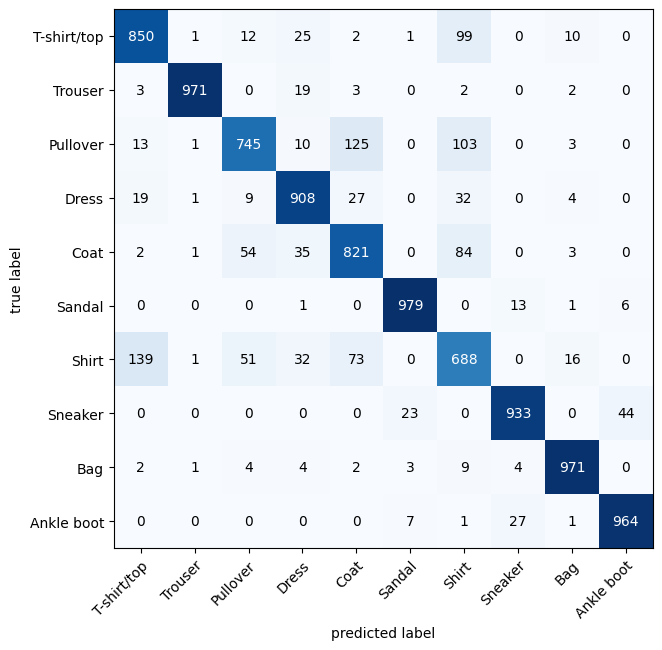

In [69]:
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

# 2. Setup confusion matrix instance and compare predictions to targets
confmat = ConfusionMatrix(num_classes=len(class_names), task='multiclass')
confmat_tensor = confmat(preds=y_pred_tensor,
                         target=test_data.targets)

# 3. Plot the confusion matrix
fig, ax = plot_confusion_matrix(
    conf_mat=confmat_tensor.numpy(), # matplotlib likes working with NumPy 
    class_names=class_names, # turn the row and column labels into class names
    figsize=(10, 7)
);

## 11. Save and load best performing model
- ```torch.save``` - a function to save a whole PyTorch model or a model's ```state_dict()```.
- ```torch.load``` - a function to load in a saved PyTorch object.
- ```torch.nn.Module.load_state_dict()``` - a function to load a saved ```state_dict()``` into an existing model instance.

In [70]:
from pathlib import Path

# create models directory
MODEL_PATH = Path('models') 
MODEL_PATH.mkdir(parents=True, # create parent directories if needed 
                 exist_ok=True # if models direcotry already exists, don't error
                 )
# save the model state dict
model_name = '03_pytorch_computer_vision_model_2.pth'
model_save_path = MODEL_PATH / model_name

# save the model dict
print(f"Saving model to: {model_save_path}")
t.save(obj=model_2.state_dict(), #only saving the state_dict() 
       f=model_save_path)

Saving model to: models/03_pytorch_computer_vision_model_2.pth


## load model

In [71]:
# Create a new instance of FashionMNISTModelV2 (the same class as our saved state_dict())
# Note: loading model will error if the shapes here aren't the same as the saved version
loaded_model_2 = FashionMNISTModelv2(input_shape=1, 
                                    hidden_units=10, # try changing this to 128 and seeing what happens 
                                    output_shape=10) 

# Load in the saved state_dict()
loaded_model_2.load_state_dict(t.load(f=model_save_path))

# Send model to GPU
loaded_model_2 = loaded_model_2.to(device)

In [79]:
# Evaluate loaded model
t.manual_seed(42)

loaded_model_2_results = eval_model_gpu(
    model=loaded_model_2,
    data_loader=test_dataloader,
    loss_fnc=loss_fn_gpu, 
    accuracy_fn=accuracy_fn
)

loaded_model_2_results

{'model_name': 'FashionMNISTModelv2',
 'model_loss': 0.32449376583099365,
 'model_acc': 88.31869009584665}

In [80]:
model_2_results

{'model_name': 'FashionMNISTModelv2',
 'model_loss': 0.32449376583099365,
 'model_acc': 88.31869009584665}

In [81]:
# Check to see if results are close to each other (if they are very far away, there may be an error)
t.isclose(t.tensor(model_2_results["model_loss"]), 
              t.tensor(loaded_model_2_results["model_loss"]),
              atol=1e-08, # absolute tolerance
              rtol=0.0001) # relative tolerance

tensor(True)